# **Forex Bid Price Prediction**

### **I want to predict the number of times the bid prices changes within a time interval and classify whether the bid price rises in the next time interval or not.**

### For now, I didn't make any changes to the dataframe.But, I would like to extract Monthly changes by splitting Timestamp column.

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('/content/FOREX_usddkk-hour-High.csv')

In [3]:
df

,Timestamp,Bid_Open,Bid_High,Bid_Low,Bid_Close,Bid_Volume,Ask_Open,Ask_High,Ask_Low,Ask_Close,Ask_Volume,Class
0,'2012-01-01T23:00:00',5.74280,5.74397,5.73899,5.74051,383.6400,5.74439,5.74701,5.73968,5.74353,235.2000,True
1,'2012-01-02T00:00:00',5.74076,5.74333,5.73719,5.74014,352.2400,5.74328,5.74913,5.73823,5.74271,328.9600,True
2,'2012-01-02T01:00:00',5.74013,5.74609,5.73906,5.73953,348.1300,5.74272,5.74661,5.73972,5.74254,344.0500,False
3,'2012-01-02T02:00:00',5.73997,5.74392,5.73943,5.74261,538.5100,5.74093,5.74616,5.74040,5.74417,574.9600,True
4,'2012-01-02T03:00:00',5.74234,5.75146,5.74234,5.74635,1206.7200,5.74310,5.75336,5.74310,5.74671,1133.7100,False
...,...,...,...,...,...,...,...,...,...,...,...,...
43820,'2018-12-31T19:00:00',6.51925,6.52442,6.51739,6.52297,7742.4502,6.51975,6.52499,6.51779,6.52354,7925.2700,False
43821,'2018-12-31T20:00:00',6.52297,6.52333,6.51771,6.51931,3648.2000,6.52352,6.52383,6.51841,6.52003,3520.2000,False
43822,'2018-12-31T21:00:00',6.51921,6.51921,6.51368,6.51652,2830.3999,6.51977,6.51977,6.51494,6.51768,2801.1001,False
43823,'2018-12-31T22:00:00',6.51653,6.51653,6.50835,6.50920,2026.8500,6.51767,6.51771,6.51169,6.51363,2009.5500,False


 ## **Dataset Description**
### **Features**
1. `Timestamp`: The time of the current data point (Europe/Amsterdam).
2. `Bid_Open`: The bid price at the start of this time interval
3. `Bid_High`: The highest bid price during this time interval
4. `Bid_Low`: The lowest bid price during this time interval
5. `Bid_Close`: The bid price at the end of this time interval
6. `Bid_Volume`: The number of times the Bid Price changed within this time interval
7. `Ask_Open`: The ask price at the start of this time interval
8. `Ask_High`: The highest ask price during this time interval
9. `Ask_Low`: The lowest ask price during this time interval
10. `Ask_Close`: The ask price at the end of this time interval
11. `Ask_Volume`: The number of times the Ask Price changed within this time interval
12. `Class`: Whether the average price will go up during the next interval

* This is the historical price data of the FOREX USD/DKK from Dukascopy.
* One instance (row) is one candlestick of one hour.
* The whole dataset has the data range from 1-1-2018 to 13-12-2018 and does not include the weekends, since the FOREX is not traded in the weekend.
* The timezone of the feature Timestamp is Europe/Amsterdam.
* The class attribute is the direction of the mean of the High_Bid and the High_Ask of the following hour,relative to the High_Bid and High_Ask mean of the current minute.
* This means the class attribute is True when the mean High price is going up the following hour,and the class attribute is False when the mean High price is going down (or stays the same) the following hour.


In [5]:
df.isna().sum()

Timestamp     0
Bid_Open      0
Bid_High      0
Bid_Low       0
Bid_Close     0
Bid_Volume    0
Ask_Open      0
Ask_High      0
Ask_Low       0
Ask_Close     0
Ask_Volume    0
Class         0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43825 entries, 0 to 43824
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Timestamp   43825 non-null  object 
 1   Bid_Open    43825 non-null  float64
 2   Bid_High    43825 non-null  float64
 3   Bid_Low     43825 non-null  float64
 4   Bid_Close   43825 non-null  float64
 5   Bid_Volume  43825 non-null  float64
 6   Ask_Open    43825 non-null  float64
 7   Ask_High    43825 non-null  float64
 8   Ask_Low     43825 non-null  float64
 9   Ask_Close   43825 non-null  float64
 10  Ask_Volume  43825 non-null  float64
 11  Class       43825 non-null  bool   
dtypes: bool(1), float64(10), object(1)
memory usage: 3.7+ MB


From the above description, it is evident that there are no null values in any of the columns.

Text(0, 0.5, 'Class')

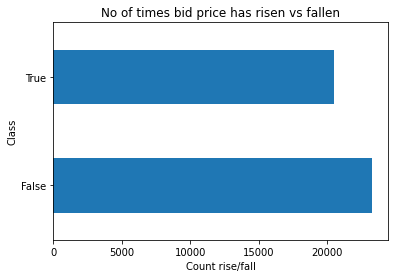

In [13]:
df['Class'].value_counts().plot(kind='barh')
plt.title('No of times bid price has risen vs fallen')
plt.xlabel('Count rise/fall')
plt.ylabel('Class')

### There is no comparable difference between the counts of Trues and Falses.So, I think that should not be a problem for prediction especially for accuracy metric

In [15]:
df['Class']=pd.get_dummies(df['Class'])

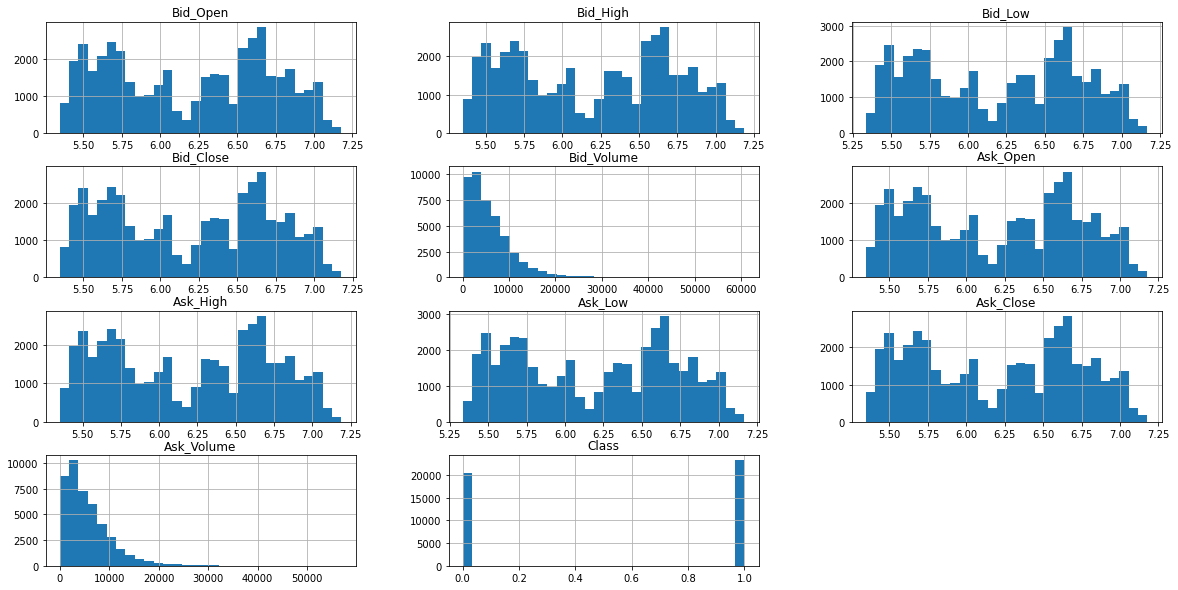

In [35]:
df.hist(bins=30,figsize=[20,10])
plt.show()[]

### **From those plots, we can say that almost all columns are equally distributed, except for Bid_Volume and Ask_Volume since they are not bid values but number of times those values changed.**

### **Moving on further, I would like to extract monthly data from 'Timestamp' and even analyze and predict monthly changes in bid prices.**